In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, classification_report
from scipy.stats import randint, uniform

In [ ]:
data_path = '../data/combined_keypoints.csv'
print(f"Loading data from {data_path}")
df = pd.read_csv(data_path)

print("First few rows of the dataset:")
print(df.head())

X = df.drop(columns=['Class'])
y = df['Class']

le = LabelEncoder()
y = le.fit_transform(y)
print("Class labels encoded.")

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
print(f"Data split into training and testing sets. Training size: {X_train.shape[0]}, Testing size: {X_test.shape[0]}")

Loading data from ../data/combined_keypoints.csv
First few rows of the dataset:
        Class    Nose_x    Nose_y  Nose_conf  LeftEye_x  LeftEye_y  \
0  Warrior_II  0.275027  0.441496   0.838373   0.257330   0.454769   
1  Warrior_II  0.361404  0.488448   0.632348   0.354708   0.496576   
2  Warrior_II  0.226947  0.543324   0.787434   0.213398   0.533082   
3  Warrior_II  0.392478  0.374899   0.328839   0.381358   0.370187   
4  Warrior_II  0.223151  0.476531   0.887696   0.211527   0.493164   

   LeftEye_conf  RightEye_x  RightEye_y  RightEye_conf  ...  LeftKnee_conf  \
0      0.874609    0.258129    0.449623       0.896995  ...       0.941765   
1      0.715429    0.351345    0.491862       0.855811  ...       0.829439   
2      0.857410    0.214061    0.525327       0.864843  ...       0.923154   
3      0.546548    0.383478    0.369107       0.577419  ...       0.324949   
4      0.910345    0.209859    0.482766       0.860895  ...       0.828863   

   RightKnee_x  RightKnee_y  R

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
print("Features standardized.")

best_knn = KNeighborsClassifier(
    algorithm='brute',
    leaf_size=24,
    metric='manhattan',
    n_neighbors=4,
    p=1.8104276900143776,
    weights='distance'
)
print("k-NN classifier initialized with best-found parameters.")

param_dist = {
    'n_neighbors': randint(2, 6),
    'leaf_size': randint(20, 30),
    'p': uniform(1.5, 2.1)
}

random_search = RandomizedSearchCV(
    best_knn, param_distributions=param_dist, n_iter=50, cv=5, n_jobs=-1, random_state=42
)
print("Starting hyperparameter tuning with focused Randomized Search.")
random_search.fit(X_train, y_train)

best_params = random_search.best_params_
best_score = random_search.best_score_
print(f"Best parameters found: {best_params}")
print(f"Best cross-validation score: {best_score:.4f}")

Features standardized.
k-NN classifier initialized with best-found parameters.
Starting hyperparameter tuning with focused Randomized Search.
Best parameters found: {'leaf_size': 29, 'n_neighbors': 4, 'p': 1.709947323217806}
Best cross-validation score: 0.6900


In [ ]:
best_knn = random_search.best_estimator_
best_knn.fit(X_train, y_train)
print("Training completed with the best hyperparameters.")
print(f"Best model: {best_knn}")

Training completed with the best hyperparameters.
Best model: KNeighborsClassifier(algorithm='brute', leaf_size=29, metric='manhattan',
                     n_neighbors=4, p=1.709947323217806, weights='distance')


In [ ]:
y_pred = best_knn.predict(X_test)
print("Predictions made on the test set.")

Predictions made on the test set.


In [ ]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

Accuracy: 0.6948
Precision: 0.7072
Recall: 0.6948
F1 Score: 0.6920


Classification Report:
                                precision    recall  f1-score   support

       Bharadvaja's_Twist_pose       0.72      0.57      0.63        23
                          Boat       0.81      0.83      0.82        47
                   Bound_Angle       0.68      0.70      0.69        37
           Bow_or_Dhanurasana_       1.00      0.83      0.91        30
                        Bridge       0.93      0.93      0.93        27
                         Camel       0.92      0.92      0.92        36
                       Cat_Cow       0.88      0.89      0.88        47
                         Chair       0.69      0.73      0.71        37
                         Child       0.80      0.94      0.87        35
                         Cobra       0.77      0.84      0.80        94
                      Cockerel       0.44      0.40      0.42        20
                        Corpse       0.62      0.74      0.68        31
                      Cow_Face       0.6

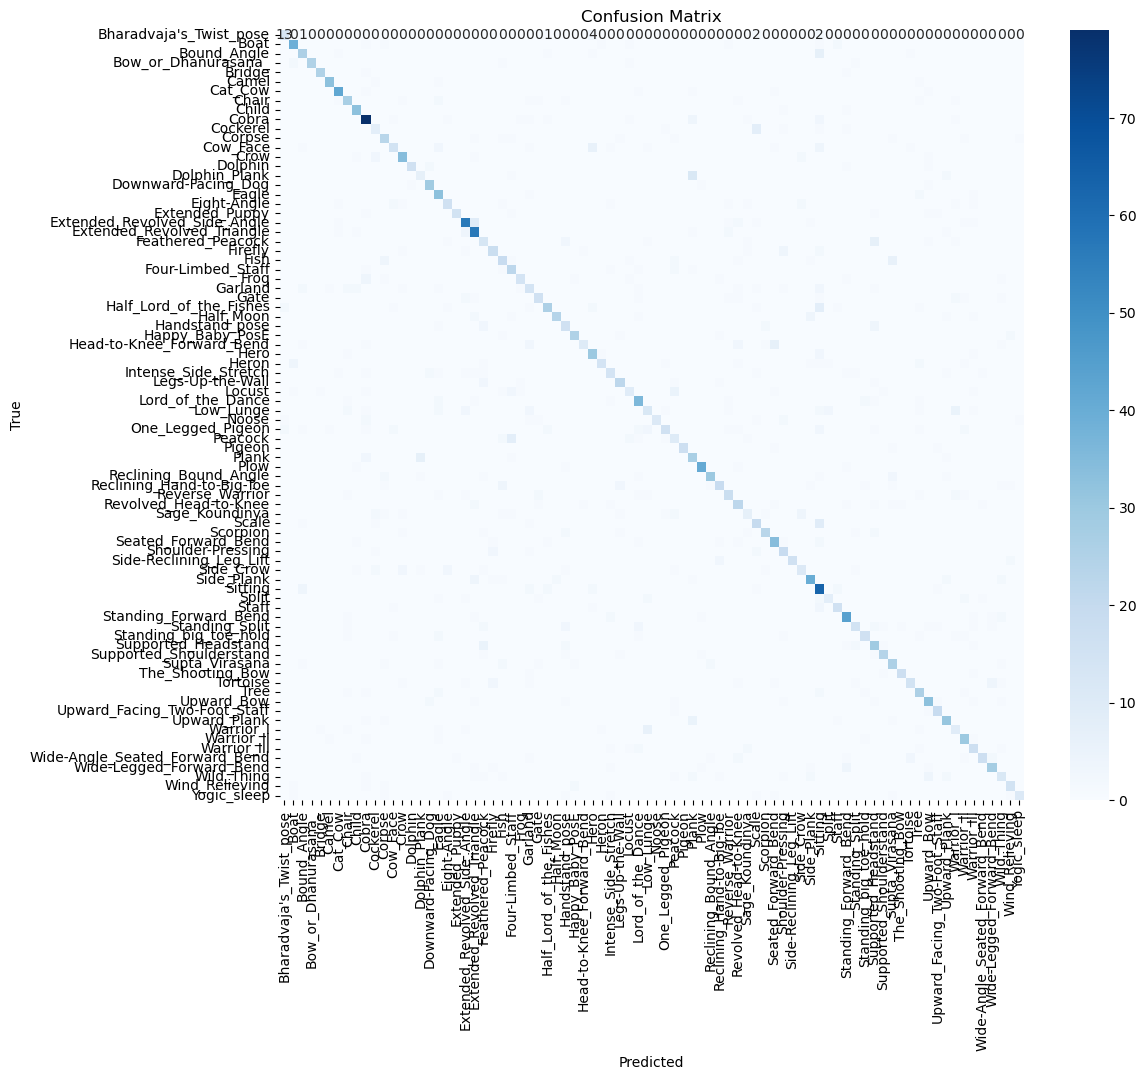

Confusion matrix displayed.


In [ ]:
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=le.classes_))

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(12, 10))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()
print("Confusion matrix displayed.")

In [ ]:
import joblib
model_path = 'best_knn_model_refined.pkl'
joblib.dump(best_knn, model_path)
print(f"Trained model saved to {model_path}")

Trained model saved to best_knn_model_refined.pkl
